In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.chdir('Titanic')
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

In [82]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
#percentage of missing values
train.isnull().mean()*100
#train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [95]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [97]:
test.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [110]:
train_missing_cols = train.columns[train.isnull().any()]
test_missing_cols = test.columns[test.isnull().any()]

In [132]:
columns = [i for i in train_missing_cols]
missingCount = [train[i].isnull().sum() for i in train_missing_cols]

In [133]:
missingCount

[177, 687, 2]

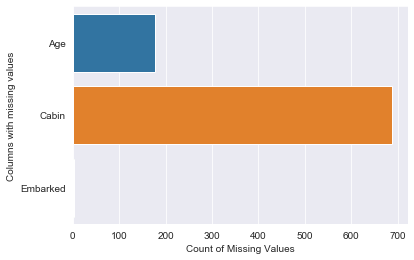

In [143]:
#plt.barh(columns, missingCount, color = 'purple', align='center')
sns.barplot(y=columns, x=missingCount, orient='h')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns with missing values')
plt.show()

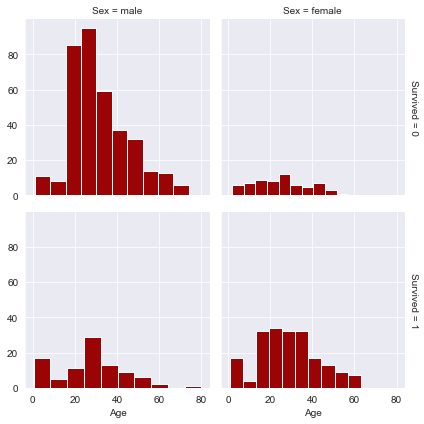

In [149]:
%matplotlib inline
sns.set_style("darkgrid")
plot = sns.FacetGrid(train, row='Survived', col='Sex', margin_titles=True)
plot.map(plt.hist, 'Age', color='#9b0404')

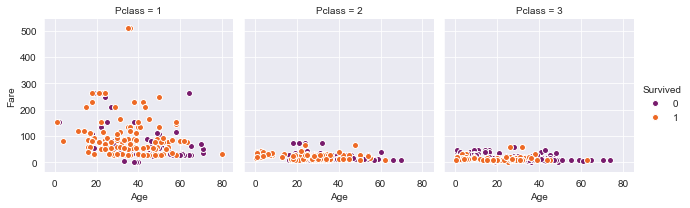

In [153]:
plot = sns.FacetGrid(train, col='Pclass', hue='Survived', palette='inferno')
plot.map(plt.scatter, 'Age', 'Fare',edgecolor="w" ).add_legend()

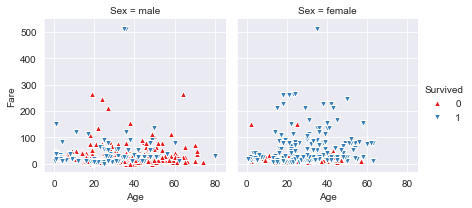

In [164]:
plot = sns.FacetGrid(train, col='Sex', hue='Survived', palette='Set1', hue_kws=dict(marker=["^", "v"]))
plot.map(plt.scatter, 'Age', 'Fare', edgecolor='w').add_legend()

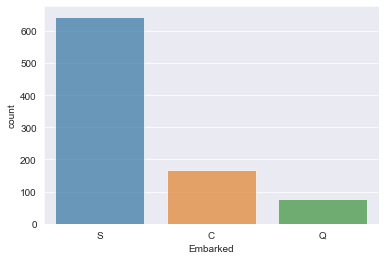

In [169]:
#train.Embarked.value_counts().plot(kind='bar')
sns.countplot(x='Embarked', data=train, alpha=0.7)

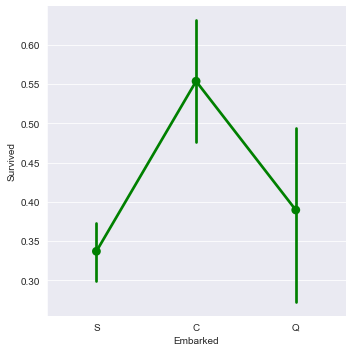

In [171]:
sns.factorplot(x='Embarked', y='Survived', data = train, color='g')

Text(0.5, 0.98, 'Men, Women Survived in each class')

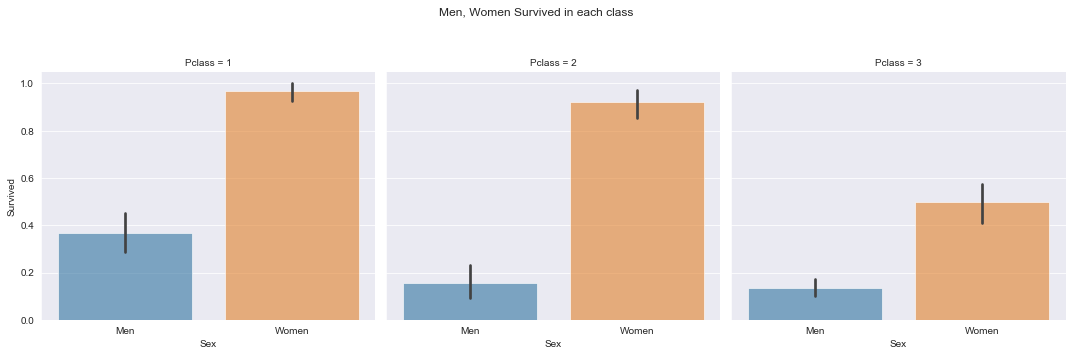

In [197]:
plot = sns.factorplot(x='Sex', y='Survived', col='Pclass', kind='bar', data=train, alpha=0.6)
plot.set_xticklabels(['Men', 'Women'])
plt.subplots_adjust(top=0.8)
plot.fig.suptitle('Men, Women Survived in each class')

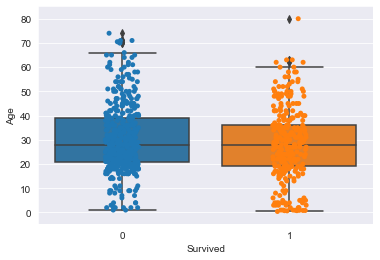

In [198]:
sns.boxplot(x='Survived', y='Age', data=train)
sns.stripplot(x='Survived', y='Age', data=train)

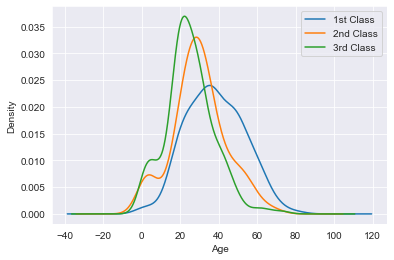

In [207]:
train.Age[train['Pclass']==1].plot(kind='kde')
train.Age[train.Pclass==2].plot(kind='kde')
train.Age[train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

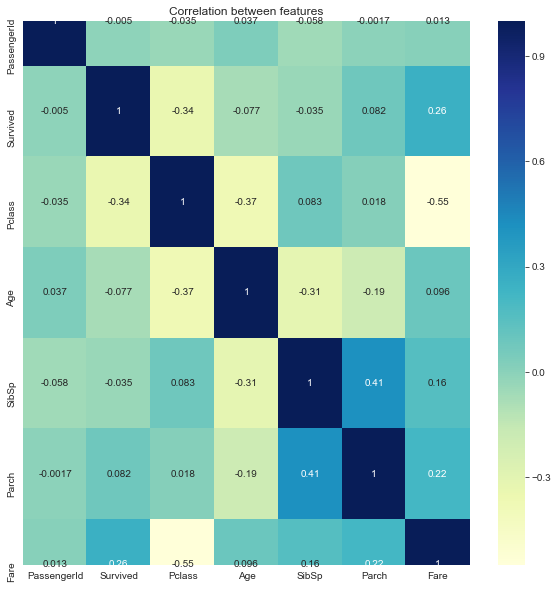

In [218]:
corr = train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True,cmap='YlGnBu',linecolor="magenta")
plt.title('Correlation between features');